In [1]:
import numpy as np
import sympy as sy
sy.init_printing()  
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# <font face="gotham" color="purple"> 相似性 </font>

如果$A = PBP^{-1}$，我们说$A$ _相似_ 于$B$，将$A$分解为$PBP^{-1}$也称为_相似变换_。

如果$n\times n$矩阵$A$和$B$相似，则它们具有 _相同的特征值_。

_对角化_，我们将在下面解释，是找到相似矩阵的过程。

# <font face="gotham" color="purple"> 对角化矩阵</font>

设$A$是一个$n\times n$矩阵。如果存在一个$n\times n$可逆矩阵$P$和一个对角矩阵$D$，使得

$$
A=PDP^{-1}
$$

那么矩阵$A$称为一个 _可对角化矩阵_。

此外，$P$的列是$A$的线性无关的特征向量，并且其相应的特征值位于$D$的对角线上。换句话说，当且仅当特征空间的基的维度为$n$时，$A$是可对角化的。</font>

让我们展示为什么这个方程成立。

设

$$
P = \left[\begin{array}{llll}
{v}_{1} & {v}_{2} & \cdots & {v}_{n}
\end{array}\right]\\
$$

$$
D = \left[\begin{array}{cccc}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & & \vdots \\
0 & 0 & \cdots & \lambda_{n}
\end{array}\right]
$$

其中$v_i, i \in (1, 2, ...n)$是$A$的特征向量，$\lambda_i, i \in (1, 2, ...n)$是$A$的特征值。

$$
AP = A\left[\begin{array}{llll}
{v}_{1} & {v}_{2} & \cdots & {v}_{n}
\end{array}\right]=\left[\begin{array}{llll}
A {v}_{1} & A {v}_{2} & \cdots & A {v}_{n}
\end{array}\right]
$$

$$P D=P\left[\begin{array}{cccc}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & & \vdots \\
0 & 0 & \cdots & \lambda_{n}
\end{array}\right]=\left[\begin{array}{lllll}
\lambda_{1} {v}_{1} & \lambda_{2} {v}_{2} & \cdots & \lambda_{n} {v}_{n}
\end{array}\right]$$

我们知道$A{v}_i = \lambda_i{v}_i$，即

$$
AP = PD
$$

由于$P$具有所有独立的特征向量，因此

$$
A = PDP^{-1}
$$

严格来说，如果$A$是对称的，即$A=A^T$，我们刚刚展示的被称为**谱分解**，相似矩阵$D$上保持所有特征值。 而$P$是正交矩阵，这意味着它的任意两列是垂直的。 因此，它可以重写为
$$
A = PDP^{T}
$$

# <font face="gotham" color="purple"> 谱分解可视化</font>

这些图表实际上展示了每个分解矩阵的功能，$P$和$P^T$用于旋转因为它们是正交的，而$D$用于缩放因为它是对角的。

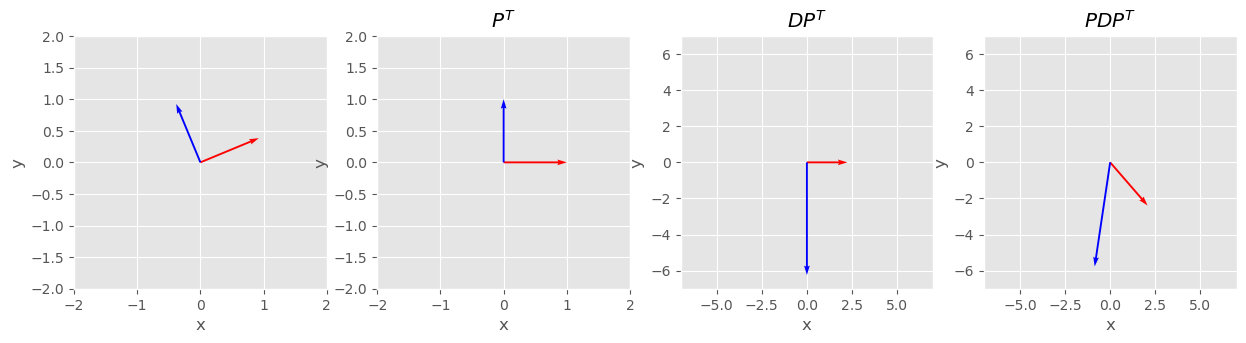

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrix A
A = np.array([[1, 3], [3, -5]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Plot eigenvectors
fig, ax = plt.subplots(figsize=(15, 4), nrows=1, ncols=4)
for i in range(2):
    ax[0].quiver(0, 0, eigenvectors[:,i][0], eigenvectors[:,i][1], angles='xy', 
                 scale_units='xy', scale=1, color=['r','b'][i])
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(-2, 2)

for i in range(4):
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_aspect('equal')

ax[1].quiver(0, 0, 1, 0, angles='xy', 
             scale_units='xy', scale=1, color=['r'])
ax[1].quiver(0, 0, 0, 1, angles='xy', 
             scale_units='xy', scale=1, color=['b'])
ax[1].set_xlim(-2, 2)
ax[1].set_ylim(-2, 2)
ax[1].set_title('$P^T$')


ax[2].quiver(0, 0, eigenvalues[0], 0, angles='xy', 
             scale_units='xy', scale=1, color=['r'])
ax[2].quiver(0, 0, 0, eigenvalues[1], angles='xy', 
             scale_units='xy', scale=1, color=['b'])
ax[2].set_xlim(-7, 7)
ax[2].set_ylim(-7, 7)
ax[2].set_title('$DP^T$')

temp = np.array([[eigenvalues[0], 0],
                 [0, eigenvalues[1]]])
temp1 = temp@eigenvectors

ax[3].quiver(0, 0, temp1[:,0][0], temp1[:,0][1], angles='xy', 
             scale_units='xy', scale=1, color=['r'])
ax[3].quiver(0, 0, temp1[:,1][0], temp1[:,1][1], angles='xy', 
             scale_units='xy', scale=1, color=['b'])
ax[3].set_xlim(-7, 7)
ax[3].set_ylim(-7, 7)
ax[3].set_title('$PDP^T$')

plt.show()

然而，在现实中我们并没有太多机会处理对称矩阵，因此谱分解在大多数情况下仅用于理论演示，实际应用较少。

# <font face="gotham" color="purple"> 对角化矩阵</font>

考虑一个矩阵

$$A=\left[\begin{array}{rrr}
1 & 3 & 3 \\
-3 & -5 & -3 \\
3 & 3 & 1
\end{array}\right]$$

我们试图对矩阵$A$进行对角化。

按照以下步骤进行：

1. 计算$A$的特征值
2. 计算$A$的特征向量
3. 构造$P$。
4. 从$P$的相应列构造$D$。

In [3]:
A = sy.Matrix([[1,3,3], [-3, -5, -3], [3,3,1]])
eig = sy.matrices.matrices.MatrixEigen.eigenvects(A)
eig

⎡⎛       ⎡⎡-1⎤  ⎡-1⎤⎤⎞  ⎛      ⎡⎡1 ⎤⎤⎞⎤
⎢⎜       ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎢⎜-2, 2, ⎢⎢1 ⎥, ⎢0 ⎥⎥⎟, ⎜1, 1, ⎢⎢-1⎥⎥⎟⎥
⎢⎜       ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣0 ⎦  ⎣1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠⎦

提醒一下，返回值采用以下形式 ```[(eigenval, multiplicity, eigenspace), ...]```.

构造$P$

In [4]:
P = sy.zeros(3, 3)
P[:, 0] = eig[0][2][0]
P[:, 1] = eig[0][2][1]
P[:, 2] = eig[1][2][0]
P

⎡-1  -1  1 ⎤
⎢          ⎥
⎢1   0   -1⎥
⎢          ⎥
⎣0   1   1 ⎦

构造$D$

In [5]:
D = sy.diag(eig[0][0], eig[0][0], eig[1][0])
D

⎡-2  0   0⎤
⎢         ⎥
⎢0   -2  0⎥
⎢         ⎥
⎣0   0   1⎦

我们可以验证$PDP^{-1}=A$是否成立：

In [6]:
P * D * P.inv() == A 

True

当然，我们不需要单独进行这个过程。SymPy中有```diagonalize```方法。

In [7]:
P, D = A.diagonalize()

In [8]:
P

⎡-1  -1  1 ⎤
⎢          ⎥
⎢1   0   -1⎥
⎢          ⎥
⎣0   1   1 ⎦

In [9]:
D

⎡-2  0   0⎤
⎢         ⎥
⎢0   -2  0⎥
⎢         ⎥
⎣0   0   1⎦

我们得到了与先前单独步骤相同的结果。

有时我们只想测试一个矩阵是否可对角化，然后在SymPy中使用```is_diagonalizable```。

In [10]:
A.is_diagonalizable()

True

如果$A$是对称的，它的所有特征向量都是正交的。

$$
Av_1 = \lambda_1v_1 \quad \text{and} \quad Av_2 = \lambda_2v_2
$$

$$
v_2 \cdot Av_1 = \lambda_1v_1 \cdot v_2\\
v_1 \cdot Av_2 = \lambda_2v_2 \cdot v_1
$$

$$
v_1 \cdot Av_2 = v_1 \cdot A^Tv_2 = v_1 \cdot \lambda_2v_2 = \lambda_2v_1 \cdot v_2\\
v_2 \cdot Av_1 = v_2 \cdot A^Tv_1 = v_2 \cdot \lambda_1v_1 = \lambda_1v_2 \cdot v_1
$$